# IT5006 Group Project

## Load the data

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import datetime

In [73]:
col_names = ['unit_id', 'cycle', 'sys1', 'sys2', 'sys3'] + [f"sensor{i}" for i in range(1, 22)]

train_df1 = pd.read_csv('data/train_FD001.txt', delim_whitespace=True, header=None, names=col_names)
train_df2 = pd.read_csv('data/train_FD002.txt', delim_whitespace=True, header=None, names=col_names)
train_df3 = pd.read_csv('data/train_FD003.txt', delim_whitespace=True, header=None, names=col_names)
train_df4 = pd.read_csv('data/train_FD004.txt', delim_whitespace=True, header=None, names=col_names)

## How the data looks like (Taking FD001 as an example)

In [74]:
train_df1.head()

,unit_id,cycle,sys1,sys2,sys3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


## Remove uninformative (near-constant) columns

By analysing all the fields using `describe` method, we can find fields 'sys3', 'sensor1', 'sensor5', 'sensor6', 'sensor10', 'sensor16', 'sensor18' and 'sensor19' are not changing much through the entire engine life, therefore we can drop them directly:

In [75]:
static_cols = ['sys3', 'sensor1', 'sensor5', 'sensor6', 'sensor10', 'sensor16', 'sensor18', 'sensor19'];
train_df1[static_cols].describe()

,sys3,sensor1,sensor5,sensor6,sensor10,sensor16,sensor18,sensor19
count,20631.0,2.063100e+04,2.063100e+04,20631.000000,2.063100e+04,2.063100e+04,20631.0,20631.0
mean,100.0,5.186700e+02,1.462000e+01,21.609803,1.300000e+00,3.000000e-02,2388.0,100.0
std,0.0,6.537152e-11,3.394700e-12,0.001389,4.660829e-13,1.556432e-14,0.0,0.0
min,100.0,5.186700e+02,1.462000e+01,21.600000,1.300000e+00,3.000000e-02,2388.0,100.0
25%,100.0,5.186700e+02,1.462000e+01,21.610000,1.300000e+00,3.000000e-02,2388.0,100.0
50%,100.0,5.186700e+02,1.462000e+01,21.610000,1.300000e+00,3.000000e-02,2388.0,100.0
75%,100.0,5.186700e+02,1.462000e+01,21.610000,1.300000e+00,3.000000e-02,2388.0,100.0
max,100.0,5.186700e+02,1.462000e+01,21.610000,1.300000e+00,3.000000e-02,2388.0,100.0


In [76]:
train_df1.drop(columns=static_cols, inplace=True)

In [77]:
train_df1

,unit_id,cycle,sys1,sys2,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640


## Find missing cycle per unit (if any)
At least for FD001 we don't see missing cycles in the raw data.

In [78]:
def find_missing_cycles(df):
    missing_cycles = {}
    for unit_id, group in df.groupby('unit_id'):
        actual_cycles = group['cycle'].values
        expected_cycles = list(range(1, group['cycle'].max() + 1))  # Create the expected cycle sequence
        missing = sorted(set(expected_cycles) - set(actual_cycles))  # Compare and find missing cycles
        if missing:
            missing_cycles[unit_id] = missing
    return missing_cycles

missing_cycles = find_missing_cycles(train_df1)
if (len(missing_cycles)):
    print(missing_cycles)

## Check and fill null values (if any)
At least for FD001 we don't see null values.

In [79]:
for col in train_df1.columns:
    if(train_df1[col].isnull().any()):
        print("Column ",col," has null value(s).")
        train_df1[col] = train_df1.groupby('unit_num')[col].transform(lambda x: x.fillna(x.mean()))
# train_df1.describe()

## Add Remaining Useful Life (RUL) as target

In [81]:
train_df1['RUL'] = train_df1.groupby('unit_id')['cycle'].transform(lambda x: x.max() - x)
train_df1

,unit_id,cycle,sys1,sys2,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1


## Check correlation
This indicates sensor 9 and sensor 14 are highly correlated. We may consider drop one of them.

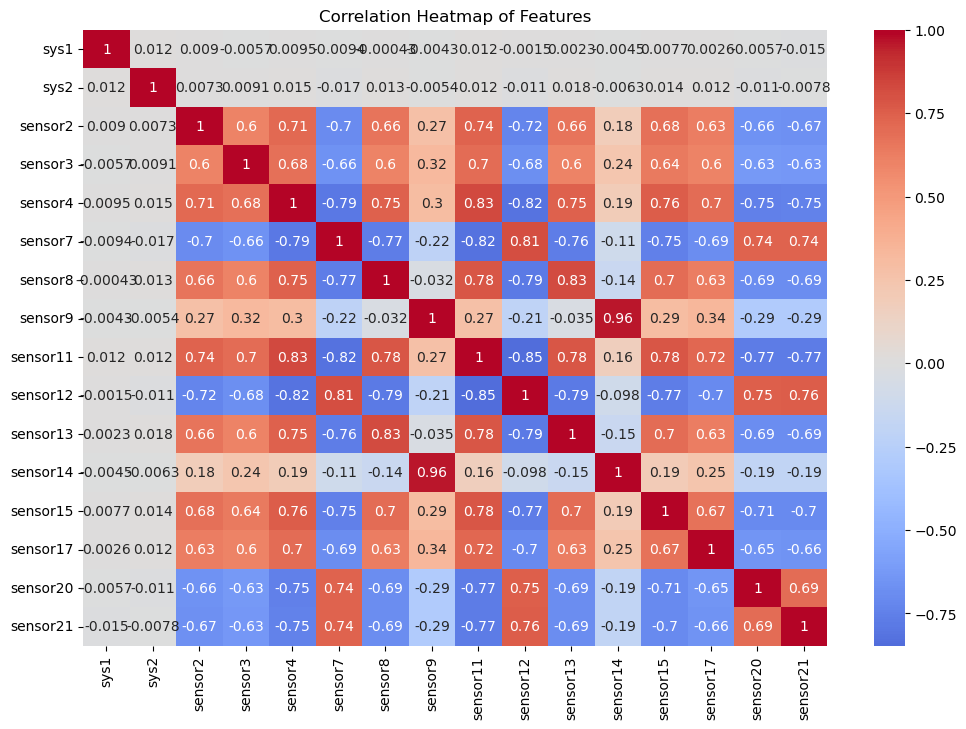

In [136]:
import seaborn as sns

cols = train_df1.columns
features_to_correlate = cols[~cols.isin(['unit_id', 'cycle', 'RUL'])]

correlation_matrix = train_df1[features_to_correlate].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Heatmap of Features')
plt.show()

## Check outliers by box plot
This **might** indicate we should not do min-max scaling, or we should perform sliding window to smoothen the data first.

### Box plot for the entire dataset

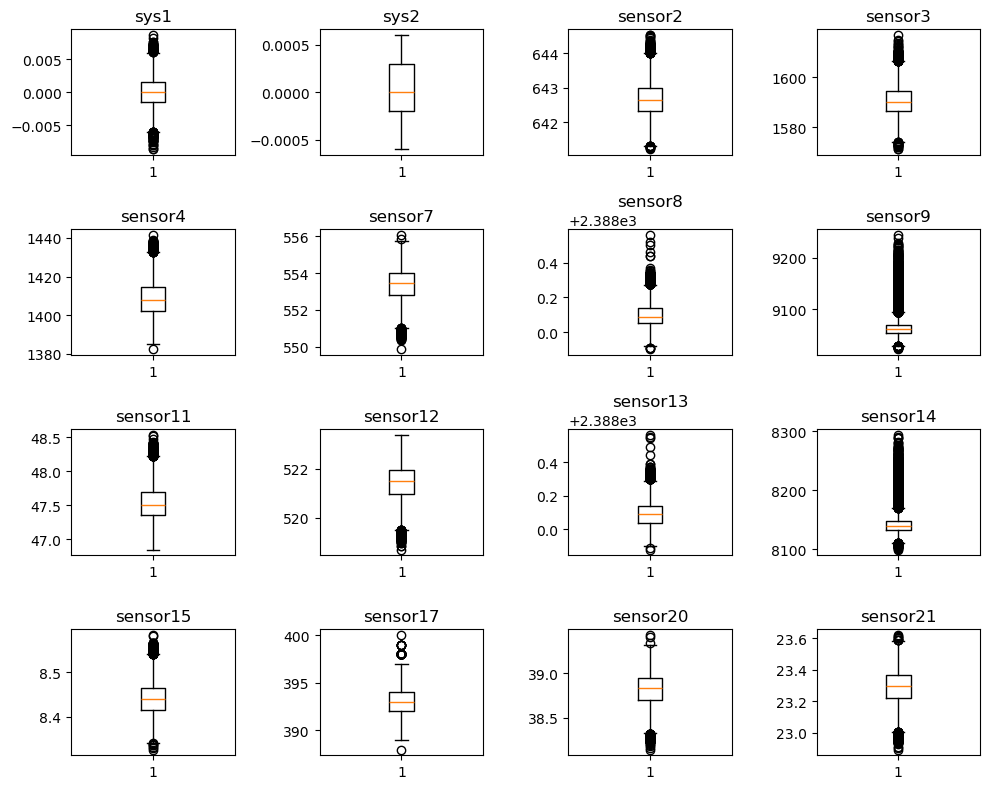

In [82]:
# Create a 4x4 grid of subplots
fig, axs = plt.subplots(4, 4, figsize=(10, 8)) 

cols = train_df1.columns
cols = cols[~cols.isin(['unit_id', 'cycle', 'RUL'])]
cnt = len(cols) # 16

for i in range(4):
    for j in range(4):
        ind = i*4 + j
        axs[i, j].boxplot(train_df1[cols[ind]])
        # axs[i, j].scatter([1] * cnt, train_df1[cols[ind]], s=100)
        axs[i, j].set_title(cols[ind])

plt.tight_layout()
plt.show()

### Box plot for one unit (unit_id = 1)
We can see that when looking into the data on single unit level, the sensor readings tend to have less outliers.

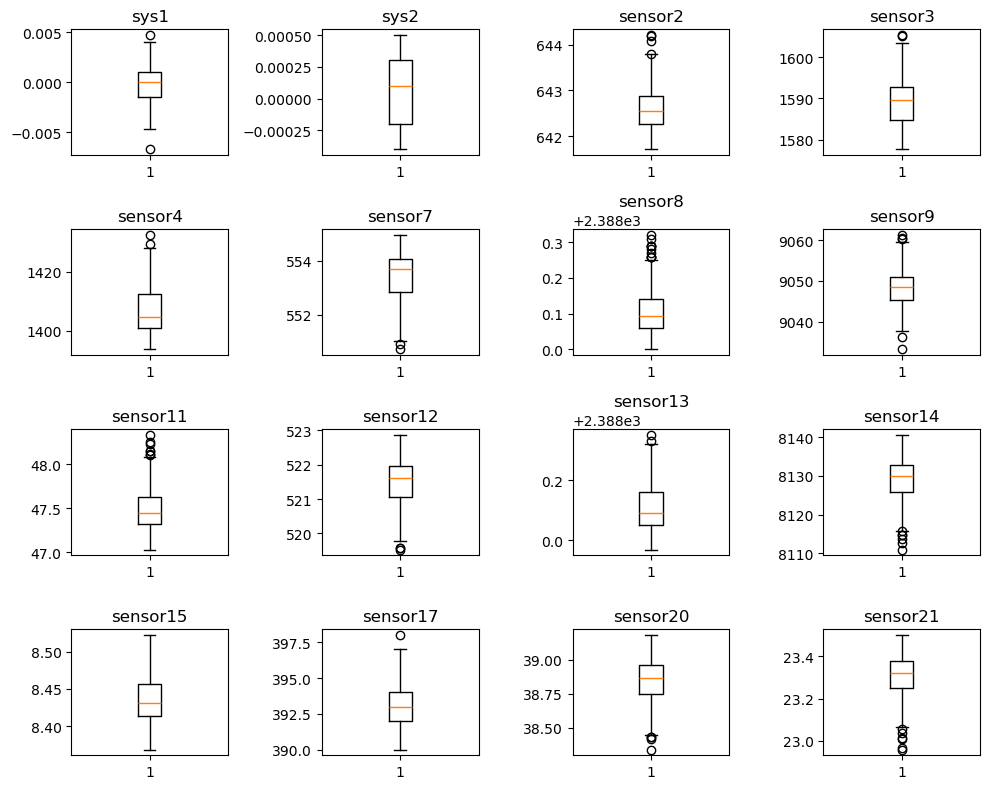

In [125]:
# Create a 4x4 grid of subplots
fig, axs = plt.subplots(4, 4, figsize=(10, 8)) 

cols = train_df1.columns
cols = cols[~cols.isin(['unit_id', 'cycle', 'RUL'])]
cnt = len(cols) # 16

for i in range(4):
    for j in range(4):
        ind = i*4 + j
        axs[i, j].boxplot(train_df1[train_df1['unit_id'] == 1][cols[ind]])
        # axs[i, j].scatter([1] * cnt, train_df1[cols[ind]], s=100)
        axs[i, j].set_title(cols[ind])

plt.tight_layout()
plt.show()

## Check data trend by line plot for one unit (unit_id = 1)
At least we can say sensor4 reading is not linearly or binomially related to the RUL.

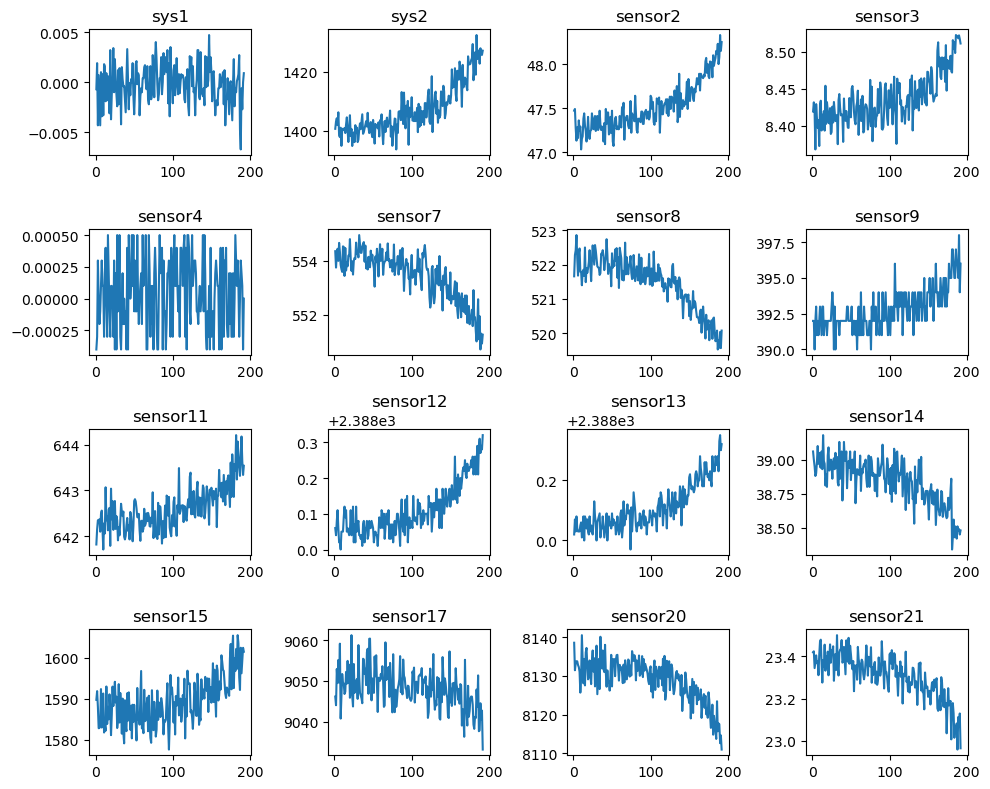

In [119]:
# Create a 4x4 grid of subplots
fig, axs = plt.subplots(4, 4, figsize=(10, 8)) 

cols = train_df1.columns
cols = cols[~cols.isin(['unit_id', 'cycle', 'RUL'])]
cnt = len(cols) # 16

unit_data = train_df1[train_df1['unit_id'] == 1]
for i in range(4):
    for j in range(4):
        col = cols[i*4 + j]
        axs[j, i].plot(unit_data['cycle'], unit_data[col])
        axs[i, j].set_title(col)

plt.tight_layout()
plt.show()


## Adding rolling window features (start with window size 30)

### Add statistical features

In [90]:
def create_statistic_features(df, window_size=30):
    features = []
    for unit_id in df['unit_id'].unique():
        unit_data = df[df['unit_id'] == unit_id]
        for start_idx in range(len(unit_data) - window_size + 1):
            window = unit_data.iloc[start_idx:start_idx + window_size]
            feature = {
                'unit_id': unit_id,
                'start_cycle': window['cycle'].iloc[0],
                'end_cycle': window['cycle'].iloc[-1]
            }
            for sensor in [col for col in df.columns if col.startswith('sensor')]:
                sensor_data = window[sensor]
                feature[f'{sensor}_mean'] = sensor_data.mean()
                feature[f'{sensor}_std'] = sensor_data.std()
                feature[f'{sensor}_min'] = sensor_data.min()
                feature[f'{sensor}_max'] = sensor_data.max()
                feature[f'{sensor}_range'] = sensor_data.max() - sensor_data.min()
                feature[f'{sensor}_median'] = sensor_data.median()
                feature[f'{sensor}_var'] = sensor_data.var()
                feature[f'{sensor}_skew'] = sensor_data.skew()
                feature[f'{sensor}_kurt'] = sensor_data.kurtosis()
            features.append(feature)
    return pd.DataFrame(features)

window_df1 = create_statistic_features(train_df1)
window_df1.head()

,unit_id,start_cycle,end_cycle,sensor2_mean,sensor2_std,sensor2_min,sensor2_max,sensor2_range,sensor2_median,sensor2_var,...,sensor20_kurt,sensor21_mean,sensor21_std,sensor21_min,sensor21_max,sensor21_range,sensor21_median,sensor21_var,sensor21_skew,sensor21_kurt
0,1,1,30,642.328333,0.328498,641.71,643.07,1.36,642.35,0.107911,...,0.348648,23.385460,0.052695,23.2757,23.4787,0.2030,23.3809,0.002777,-0.243558,-0.429351
1,1,2,31,642.335000,0.319739,641.71,643.07,1.36,642.35,0.102233,...,0.599363,23.382670,0.053073,23.2757,23.4787,0.2030,23.3783,0.002817,-0.109781,-0.531017
2,1,3,32,642.341000,0.317830,641.71,643.07,1.36,642.35,0.101016,...,0.532064,23.385213,0.056799,23.2757,23.4999,0.2242,23.3783,0.003226,0.077417,-0.470526
3,1,4,33,642.353000,0.324899,641.71,643.07,1.36,642.35,0.105560,...,0.209581,23.385427,0.056652,23.2757,23.4999,0.2242,23.3783,0.003209,0.071511,-0.447629
4,1,5,34,642.359333,0.326686,641.71,643.07,1.36,642.36,0.106724,...,0.071073,23.383270,0.058313,23.2757,23.4999,0.2242,23.3783,0.003400,0.102266,-0.632021


### Add trend feature
**Slope**: Linear trend over the window using linear regression

In [95]:
from scipy.stats import linregress

def add_trend_features(feature_df, df, window_size=30):
    for unit_id in df['unit_id'].unique():
        unit_data = df[df['unit_id'] == unit_id]
        for start_idx in range(len(unit_data)- window_size + 1):
            window = unit_data.iloc[start_idx:start_idx + window_size]
            for sensor in [col for col in df.columns if col.startswith('sensor')]:
                slope, _, _, _, _ = linregress(range(window_size), window[sensor])
                feature_df.loc[(feature_df['unit_id']== unit_id) & 
                               (feature_df['start_cycle'] == window['cycle'].iloc[0]),
                               f'{sensor}_slope'] = slope
    return feature_df

window_df = add_trend_features(window_df1, train_df1)
window_df.head()

,unit_id,start_cycle,end_cycle,sensor2_mean,sensor2_std,sensor2_min,sensor2_max,sensor2_range,sensor2_median,sensor2_var,...,sensor8_slope,sensor9_slope,sensor11_slope,sensor12_slope,sensor13_slope,sensor14_slope,sensor15_slope,sensor17_slope,sensor20_slope,sensor21_slope
0,1,1,30,642.328333,0.328498,641.71,643.07,1.36,642.35,0.107911,...,0.000407,-0.007548,0.001357,0.004338,0.000503,-0.021464,0.000115,0.010679,-0.000934,-0.000114
1,1,2,31,642.335000,0.319739,641.71,643.07,1.36,642.35,0.102233,...,0.000505,0.027604,0.003471,0.000843,0.000405,-0.027591,0.000162,0.011568,-0.000543,-0.000207
2,1,3,32,642.341000,0.317830,641.71,643.07,1.36,642.35,0.101016,...,0.000198,-0.007853,0.004716,0.001301,0.000699,-0.048438,0.000326,0.012458,0.000004,0.000832
3,1,4,33,642.353000,0.324899,641.71,643.07,1.36,642.35,0.105560,...,0.000167,-0.009982,0.004745,0.002821,0.000781,-0.026038,0.000146,-0.000445,-0.001028,0.000326
4,1,5,34,642.359333,0.326686,641.71,643.07,1.36,642.36,0.106724,...,0.000296,-0.037711,0.005030,0.006247,0.001250,-0.050416,0.000027,-0.000445,-0.002618,-0.000245


## Look into the rolling features of one sensor (sensor9) and one unit (unit_id = 1)

### Box plot

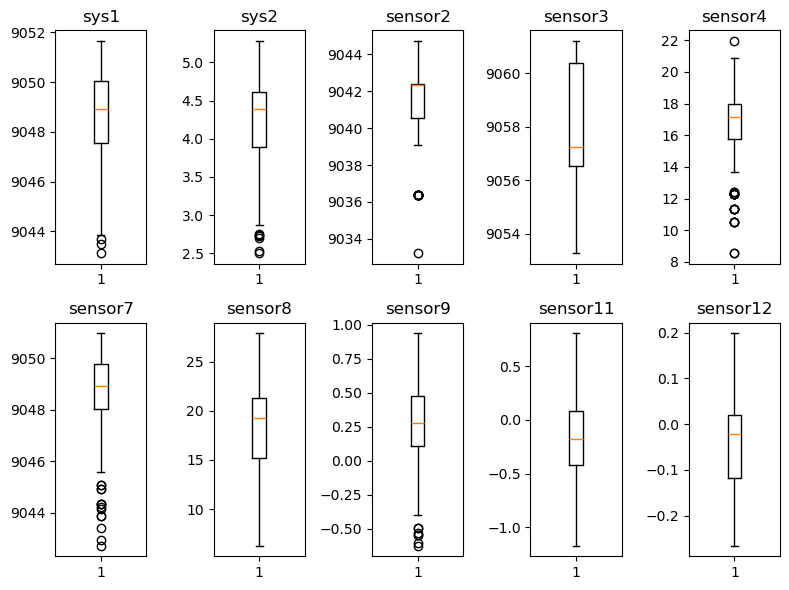

In [123]:
# Create a 5x2 grid of subplots
fig, axs = plt.subplots(2, 5, figsize=(8, 6)) 

sensor9_cols = [col for col in window_df.columns if col.startswith('sensor9')]
cnt = len(sensor9_cols) # 10

for i in range(2):
    for j in range(5):
        ind = i*5 + j
        axs[i, j].boxplot(window_df[window_df['unit_id'] == 1][sensor9_cols[ind]])
        # axs[i, j].scatter([1] * cnt, window_df[cols[ind]], s=100)
        axs[i, j].set_title(cols[ind])

plt.tight_layout()
plt.show()

### Line plot

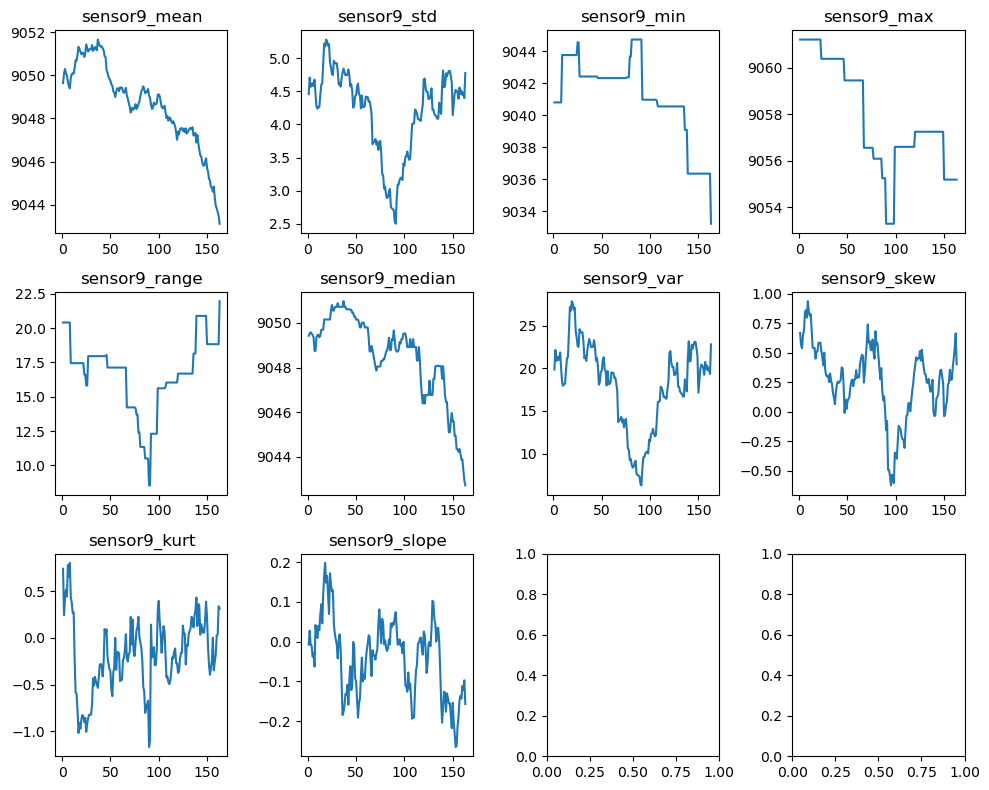

In [133]:
# Create a 4x3 grid of subplots
fig, axs = plt.subplots(3, 4, figsize=(10, 8)) 

sensor9_cols = [col for col in window_df.columns if col.startswith('sensor9')]
cnt = len(sensor9_cols) # 10

unit_data = window_df[window_df['unit_id'] == 1]
for i in range(3):
    for j in range(4):
        ind = i*4 + j
        if (ind >= 10): continue
        col = sensor9_cols[ind]
        axs[i, j].plot(unit_data['start_cycle'], unit_data[col])
        axs[i, j].set_title(col)

plt.tight_layout()
plt.show()    

In [20]:
col_names = ['unit_num', 'time', 'sys1', 'sys2', 'sys3'] + [f"sensor{i}" for i in range(1, 22)]

test_df1 = pd.read_csv('data/test_FD001.txt', delim_whitespace=True, header=None, names=col_names)
test_df2 = pd.read_csv('data/test_FD002.txt', delim_whitespace=True, header=None, names=col_names)
test_df3 = pd.read_csv('data/test_FD003.txt', delim_whitespace=True, header=None, names=col_names)
test_df4 = pd.read_csv('data/test_FD004.txt', delim_whitespace=True, header=None, names=col_names)

In [21]:
print(len(test_df1))
test_df4.head()

13096


,unit_num,time,sys1,sys2,sys3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,20.0072,0.7000,100.0,491.19,606.67,1481.04,1227.81,9.35,...,313.03,2387.78,8048.98,9.2229,0.02,362,2324,100.00,24.31,14.7007
1,1,2,24.9984,0.6200,60.0,462.54,536.22,1256.17,1031.48,7.05,...,163.61,2028.09,7863.46,10.8632,0.02,306,1915,84.93,14.36,8.5748
2,1,3,42.0000,0.8420,100.0,445.00,549.23,1340.13,1105.88,3.91,...,129.98,2387.95,8071.13,9.3960,0.02,328,2212,100.00,10.39,6.4365
3,1,4,42.0035,0.8402,100.0,445.00,549.19,1339.70,1107.26,3.91,...,129.48,2387.90,8078.89,9.3594,0.02,328,2212,100.00,10.56,6.2367
4,1,5,35.0079,0.8400,100.0,449.44,555.10,1353.04,1117.80,5.48,...,181.82,2387.87,8057.83,9.3030,0.02,333,2223,100.00,14.85,8.9326


In [35]:
rul_df1 = pd.read_csv('data/RUL_FD001.txt', delim_whitespace=True, header=None)
rul_df2 = pd.read_csv('data/RUL_FD002.txt', delim_whitespace=True, header=None)
rul_df3 = pd.read_csv('data/RUL_FD003.txt', delim_whitespace=True, header=None)
rul_df4 = pd.read_csv('data/RUL_FD004.txt', delim_whitespace=True, header=None)

In [36]:
print(len(rul_df4))
rul_df4.head()

248


,0
0,22
1,39
2,107
3,75
4,149


## y